In [11]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")

Activated /Users/matiasbayas-erazo/JuliaBasics/quantecon-notebooks-julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


# 1. Basics 

## Getting Help

In [7]:
? repeat

search: repeat RecipeData RecipesBase



```
repeat(A::AbstractArray, counts::Integer...)
```

Construct an array by repeating array `A` a given number of times in each dimension, specified by `counts`.

# Examples

```jldoctest
julia> repeat([1, 2, 3], 2)
6-element Array{Int64,1}:
 1
 2
 3
 1
 2
 3

julia> repeat([1, 2, 3], 2, 3)
6×3 Array{Int64,2}:
 1  1  1
 2  2  2
 3  3  3
 1  1  1
 2  2  2
 3  3  3
```

---

```
repeat(A::AbstractArray; inner=ntuple(x->1, ndims(A)), outer=ntuple(x->1, ndims(A)))
```

Construct an array by repeating the entries of `A`. The i-th element of `inner` specifies the number of times that the individual entries of the i-th dimension of `A` should be repeated. The i-th element of `outer` specifies the number of times that a slice along the i-th dimension of `A` should be repeated. If `inner` or `outer` are omitted, no repetition is performed.

# Examples

```jldoctest
julia> repeat(1:2, inner=2)
4-element Array{Int64,1}:
 1
 1
 2
 2

julia> repeat(1:2, outer=2)
4-element Array{Int64,1}:
 1
 2
 1
 2

julia> repeat([1 2; 3 4], inner=(2, 1), outer=(1, 3))
4×6 Array{Int64,2}:
 1  2  1  2  1  2
 1  2  1  2  1  2
 3  4  3  4  3  4
 3  4  3  4  3  4
```

---

```
repeat(s::AbstractString, r::Integer)
```

Repeat a string `r` times. This can be written as `s^r`.

See also: [`^`](@ref)

# Examples

```jldoctest
julia> repeat("ha", 3)
"hahaha"
```

---

```
repeat(c::AbstractChar, r::Integer) -> String
```

Repeat a character `r` times. This can equivalently be accomplished by calling [`c^r`](@ref ^).

# Examples

```jldoctest
julia> repeat('A', 3)
"AAA"
```


##  Shell Commands
Preappend a semicolon to run shell comands in Jupyter

In [10]:
; ls

fundamental_types.ipynb
getting_started.ipynb
index.ipynb
introduction_to_types.ipynb
julia_basics.ipynb
julia_by_example.ipynb
julia_environment.ipynb
julia_essentials.ipynb
us_cities.txt


# 2. Introductory Examples

### Example: Plotting a white noise process
`using` provides a way to say that a particular code or notebook will use the package:

In [12]:
using LinearAlgebra, Statistics

Built-in functions are there like `randn` which returns a single draw from standard normal distribution

In [13]:
randn()

0.42458582025712205

For other functions we have to import the relevant library:

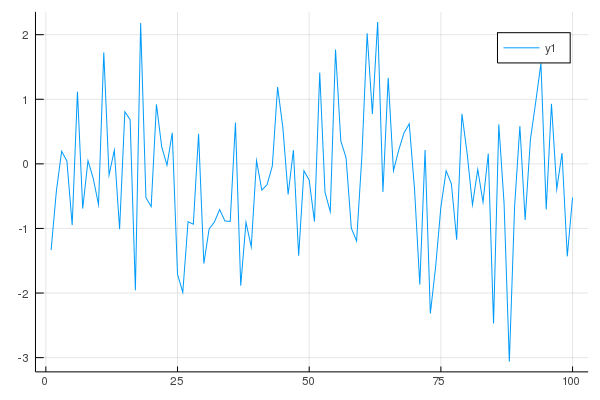

In [14]:
using Plots
gr(fmt=:png) # setting for easier display in Jupyter notebooks

n = 100
ϵ = randn(n)
plot(1:n, ϵ)

Let's break this down:
1. The statement `using Plots` makes all names exported by the `Plots` module available
2. Arguments to `plot` are the values for the x-axis and a vector of `ϵ` for the y-axis and (optional) settings

In Julia 1-D arrays are interpreted as column vectors. We can select some elements from the array with standard indexing:

In [28]:
ϵ[1:5]

5-element Array{Float64,1}:
 -0.0995292967475163 
  1.8657128205189246 
  0.8693630643062685 
 -0.12568846541572196
  0.3131413273141676 

## For Loops

In [29]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [30]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

Here, `eachindex(ϵ)` returns an iterator of indices which can be used to access  ϵ

In Julia you can also loop directly over arrays themselves, like:

In [31]:
ϵ_sum = 0.0 # Make sure to use 0.0 here, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum/m

-0.5906047062561427

We also have built-in functions that can perform these operations:

In [32]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m])/m

true

Note the use of `≈` to test equality rather than `==` which is appropriate for integers and other types of arrays. Approximately equal (typed with `\approx<TAB>`) is the appropriate way to compare any floating point numbers due to standard issues of floating point math.

## User-Defined Functions

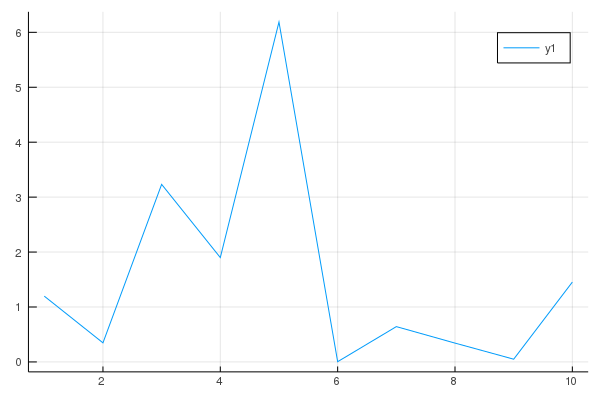

In [34]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # squaring the result
    end
    return ϵ
end

data = generatedata(10)
plot(data)    

Let's break it down:
1. `function` is a Julia keyword that indivates the start of a function definition
2. `generatedata` is the arbitrary name for the function
3. `return` is a kewyord indicating the return value

But we can make this better remembering that `randn` can return vectors and brodcast the `^2` function over a vector using a `.`

In [37]:
function generatedata(n)
    ϵ = randn(n)
    return ϵ.^2
end
data = generatedata(5)

5-element Array{Float64,1}:
 1.5666365268826106
 2.302120157104996 
 1.9987471903097271
 1.2546300822377814
 1.1439296602554192

We can even drop the `function` if we define it on a single line.

In [38]:
generatedata(n) = randn(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 0.7536206460401361 
 0.13602852305100663
 2.760266578819566  
 3.0341461715756988 
 0.7725703396055258 

Finally, we can broadcast any function:

In [41]:
f(x) = x^2
generatedata(n) = f.(randn(n))
data = generatedata(5)

5-element Array{Float64,1}:
 1.05869985252145    
 0.030985348372958268
 0.4640233892119011  
 0.06317712041155743 
 0.747290329931635   

More abstract but useful - we can make the `generatedata` function able to generallicaly apply to a function.

In [43]:
generatedata(n, gen) = gen.(randn(n))
f(x) = x^2
generatedata(5, f) # applies the function f to the randomly generated data

5-element Array{Float64,1}:
 0.6914971224028208  
 0.3622172092556784  
 0.028232921371615278
 0.21210239668135844 
 0.3093952795471637  

Let's finish this example with some plotting:

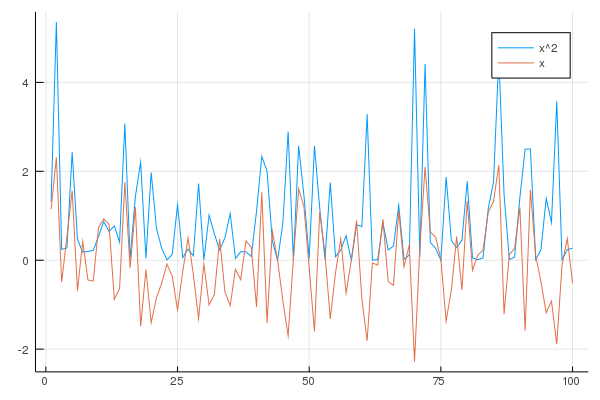

In [46]:
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = "x^2")
plot!(x, label = "x") # layers on the same plot

The additional function `plot!` adds a graph to the existing plot. This is a general convention of Julia where a function that modifies the arguments or a global state has a `!` at the end of its name.

Let's now build a more useful function - plotting a histogram of observations from a given probability distribution. We will make use of the `Distributions` package

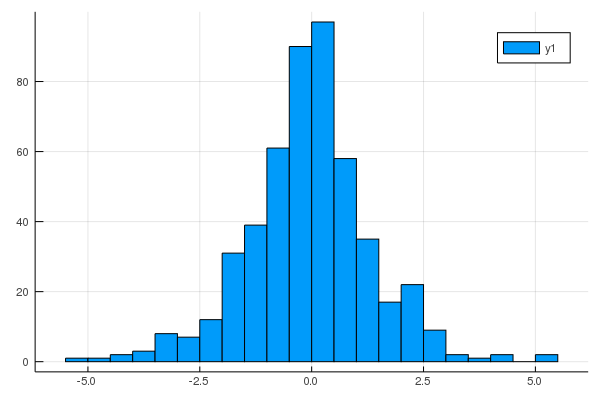

In [49]:
using Distributions
function plothistogram(distribution, n)
    ϵ = rand(distribution, n) # n draws from distribution
    histogram(ϵ)
end
lp = Laplace()
plothistogram(lp, 500)

The function `rand()` is defined in the base library such that `rand(n)` returns `n` uniform random variables on $[0,1)$

In [50]:
rand(3)

3-element Array{Float64,1}:
 0.6731806485671303 
 0.9338779298447686 
 0.06935707961941384

But `rand()` can take another distribution as an argument thanks to multiple dispatch - this is the idea that functions in Julia can have different behavior depending on the particular arguments that they are passed. So we can take an existing function and give it a new behavior by defining how it acts on a new type of value.

## Application: Fixed Points

Suppose we wish to solve for scalar $v$ satisfying:
$$ v = f(v) $$
where:
$$ f(v) := p + \beta v $$

One approach is to start with an initial value and iterate the map until convergence:
$$ v^{n+1} = p + \beta v^n$$
Iterating we have that:
$$ v^{n} = p \sum_{i=0}^{n-1} \beta^i + \beta^{n} v_0  $$
So this will work provided that $| \beta | < 1$

### While Loop Approach

In [62]:
p = 1.0
β = 0.9
v0 = 0.8 # Initial guess

# Numerical Parameters
maxiter = 1000
tol = 1.0E-7
normdiff = Inf
iter = 1

# Initialize
v = v0

# Main Iteration:
while normdiff > tol && iter <= maxiter
    vi = p + β * v
    normdiff = norm(vi - v)
    # Replace and continue
    v = vi
    iter = iter + 1
end

println("Fixed point = $v, and |f(x)  - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x)  - x| = 9.181037796679448e-8 in 155 iterations


Here we used the `norm` function from the `LinearAlgebra` library to compare the values. The other new function is `println` which includes the value of a variable in a string when prefixed by `$`

### For Loop Approach

In [66]:
p = 1.0
β = 0.9
v0 = 0.8 # Initial guess

# Numerical Parameters
maxiter = 1000
tol = 1.0E-7
normdiff = Inf
iter = 1

# Initialize
v = v0

# Main Iteration:
for i in 1:maxiter
    vi = p + β*v
    normdiff = norm(vi - v)
    if normdiff < tol 
        break
    end
    v = vi
    iter = iter + 1
end
println("Fixed point = $v, and |f(x)  - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231, and |f(x)  - x| = 9.181037796679448e-8 in 154 iterations


The new feature here is `break` which leaves a `for` or `while` loop. 

### Better Style
We can do this with better style by building a function that is reusable and generic (i.e it's not specific to the specific functional form of our current problem)

In [73]:
function fixedpointmap(f, x0, tol, maxiter)
    x = x0
    diff = Inf
    iter = 1
    while diff > tol && iter <= maxiter
        xi = f(x) 
        diff = norm(xi - x)
        x = xi
        iter = iter + 1
    end
    return (x, diff, iter)
end

# Now define a specific map with its associated parameters:
p = 1.0
β = 0.9
f(v) = p + β * v

# Numerical parameters:
maxiter = 1000
tol = 1.0E-7
v0 = 0.8 

v, diff, iter = fixedpointmap(f, v0, tol, maxiter)
println("Fixed point = $v, and |f(x) - x| = $diff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


### Named Arguments and Return Values

In [77]:
function fixedpointmap(f; x0, tol = 1E-7, maxiter = 1000)
    x = x0
    diff = Inf
    iter = 1
    while diff > tol && iter <= maxiter
        xi = f(x) 
        diff = norm(xi - x)
        x = xi
        iter = iter + 1
    end
    return (value = x, diff = diff, iter = iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v
sol = fixedpointmap(f, x0 = 0.8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.diff) in $(sol.iter) iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In this example, all function parameters after the `;` must be called by name

### Using a package

In [81]:
using NLsolve
p = 1.0
β = 0.9
f(v) = p .+ β*v # Broadcast the +
sol = fixedpoint(f, [0.8])
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in $(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


The `fixedpoint` function from the `NLsolve.jl` library implements the simple fixed point iteration scheme above. Since the `NLsolve` library only accepts vector based inputs, we need to make the `f(v)` function broadcast on the `+` sign and pass the initial condition as a vector of length 1 with `[0.8]`

In [89]:
# best syle
p = 1.0 
β = 0.9
x0 = [0.8]
sol = fixedpoint(v -> p .+ β * v, x0)
println("Fixed point = $(sol.zero), convergence achieved in $(sol.iterations) iterations")

Fixed point = [9.999999999999972], convergence achieved in 3 iterations


Note we now use an anonymous function - Julia enables the creation of small functions without any names. Finally, in case you want higher precision we can call the function an arbitrary precision floating point `BigFloat` for the initial value

In [86]:
p = 1.0
β = 0.9
x0 = [BigFloat(0.8)] # higher precision
sol = fixedpoint(v -> p .+ β * v, x0)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in $(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155], and |f(x) - x| = 0.0 in 3 iterations


Finally, can use a `StaticArrays.jl` type which provides an efficient implementation for small arrays and matrices:

In [92]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
β = 0.9
x0 = @SVector [0.8, 2.0, 50.0]
f(v) = p .+ β*v
sol = fixedpoint(f, x0)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in $(sol.iterations) iterations")

Fixed point = [9.999999999999968, 19.999999999999943, 1.0000000000001918], and |f(x) - x| = 2.068235542330935e-14 in 3 iterations


The `@SVector` in front of the arrays is macro for turning a vector literal into a static vector. 

# 3. Exercises

### Exercise 1
Write a function to find $n!$ and use the built in function from Julia `factorial(n)`

In [250]:
function factorial2(n)
    out = 1.0
    for i in 1:n
        out *= i
    end
    return out
end

factorial(4) ≈ factorial2(4)

true

### Exercise 2

The binomial random variable $Y \sim Bin(n, p)$ represents:
- number of sucesses in $n$ binary trials
- each trial succeeds with probability $p$

Write a function such that it generates one draw of $Y$ using only `rand()`

In [252]:
function binomial_rv(n, p)
    count = 0
    for i in 1:n
        if rand() < p
            count += 1
        end
    end
    return count
end
binomial_rv(10, 0.5)

3

### Exercise 3
Compute an approximation to $\pi$ using Monte Carlo

In [253]:
function pi_MC(n)
    r = 1/2
    f(x1, x2) = (x1 - 1/2)^2 + (x2 - 1/2)^2
    count = 0
    for i in 1:n
        x1, x2 = rand(2) 
        if f(x1,x2) <= r^2
            count = count + 1
        end
    end

    area = count/n
    return area/r^2
end

pi = pi_MC(1000000)

3.1431

### Exercise 4 
Write a program that prints one realization of the following random device:
- Flip an unbiased coin 10 times
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar
- If not pay nothing


In [283]:
N = 10
p = 1/2
count = 0
sample = rand(N)
for i in 1:N-2
    if sample[i] <= 1/2 && sample[i+1] <= 1/2 && sample[i+2] <= 1/2
        count += 1
    end
end
if count >= 1
    print("You get one dollar!")
else
    print("You get nothing")
end

You get one dollar!

### Exercise 5
Simulate and plot the correlated time series:
$$ x_{t+1} = \alpha x_t + \epsilon_{t+1} $$
where $x_0 = 0$ and $t= 0, \dots, n$

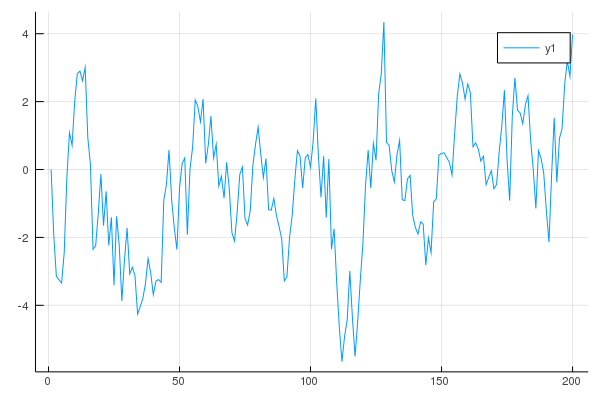

In [285]:
gr(fmt=:png)

n = 200
α = 0.9
x = zeros(n)

for i in 1:n-1
    x[i+1] = α *x[i] + randn()
end

plot(x)

Now plot three simulated time series, one for each of the cases $\alpha = 0$, $\alpha = 0.8$ and $\alpha = 0.98$

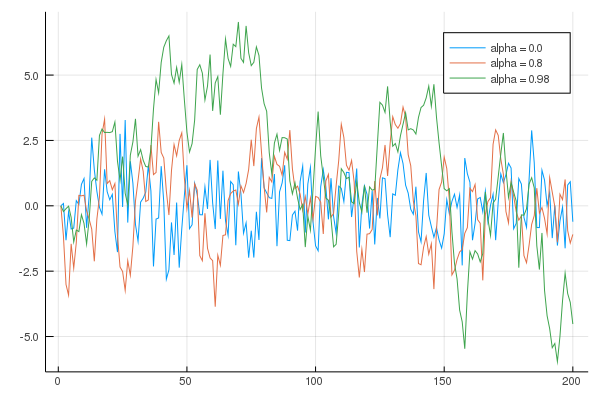

In [291]:
αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to
for a in αs
    x = zeros(n)
    for i in 1:n-1
        x[i+1] = a*x[i] + randn()
    end
    plot!(p, x, label = "alpha = $a") # adds x to plot p
end
p # display plot

### Exercise 7
Take a random walk starting from $x_0 = 1$
$$ x_{t+1} = \alpha x_t + \sigma \epsilon_{t+1} $$
where $t=0,\dots, t_{max}$. Assume that at $t = t_{max}$ the value drops to zero, i.e $x_{t_{max}} = 0$

Define a first-passage time as $T_a = \inf \{ t : x_t \leq a\}$, where by assumption $T_a \leq t_{max}$. 

Start with $\sigma = 0.2$ and $\alpha = 1$ and:
1. Calculate the first-passage time $T_{0}$ for 100 simulated random walks with $t_{max}$ and plot a histogram.
2. Plot the sample mean of $T_{0}$ from the simulation for $\alpha \in \{0.8, 1.0, 1.2\}$

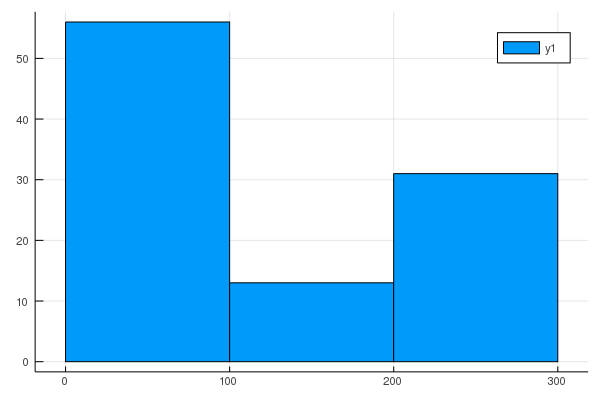

In [238]:
# Part 1
n = 100
t_max = 200

x0 = 1
α = 1.0
σ = 0.2

x = zeros(t_max, n)
T_0 = zeros(n)
x[1, :] .= x0
for j in 1:n
    ϵ = randn(t_max)
    for t in 1:t_max-1
        x[t+1, j] = α * x[t, j] + σ * ϵ[t]
        if x[t+1, j] <= 0
            T_0[j] = t 
            break
        else 
            T_0[j] = t_max 
        end
    end
end
histogram(T_0)

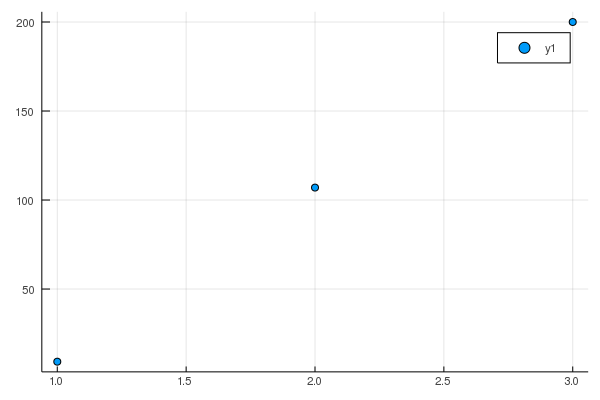

In [241]:
# Part 2, plot sample means
n = 100
t_max = 200

x0 = 1
αs = [0.8, 1.0, 1.2]
σ = 0.2

x = zeros(t_max, n)
T_0 = zeros(n, 3)
x[1, :] .= x0

for a in 1:3
    for j in 1:n
        ϵ = randn(t_max)
        for t in 1:t_max-1
            x[t+1, j] = αs[a] * x[t, j] + σ * ϵ[t]
            if x[t+1, j] <= 0
                T_0[j, a] = t 
                break
            else 
                T_0[j, a] = t_max 
            end
        end
    end
end
scatter(transpose(mean(T_0, dims = 1)))

### Exercise 8
Find the root of a function using Newton's method:
1. Start with an initial guess $x_0$ and a function $f$ with its first derivative $f'$
2. Update guess of $x$ as follows:
$$ x^{n+1} = x^{n} - \frac{f(x^n)}{f'(x^n)} $$

In [245]:
function newton_Root(f, f_prime, x0, tol = 1.0E-7, maxiter = 1000)
    x = x0
    diff = Inf
    iter = 1
    
    while diff > tol && iter <= maxiter
        xi = x - f(x)/f_prime(x)
        diff = norm(xi - x)
        x = xi
        iter = iter + 1
    end
    return x, diff, iter
end

f(x) = (x-1)^3
f_prime(x) = 3(x-1)^2
root, diff, iter = newton_Root(f, f_prime, 2)
println("The root of the function is $root, convergence achieved in $iter iterations")

The root of the function is 1.0000001356565902, convergence achieved in 40 iterations


Finally, we can calculate the derivative with auto-differentiation from `ForwardDiff` library

In [249]:
using ForwardDiff

# Define operator to get the derivative of the function:
D(f) = x -> ForwardDiff.derivative(f, x)

# Create a function:
f(x) = x^2
f_prime2 = D(f)

f(0.1), f_prime2(0.1)

(0.010000000000000002, 0.2)